In [84]:
import sys; sys.path.append('..'); from wwa import *

xn, xx, yn, yx = [-67,-47,-27,-7]
mapproj = cartopy.crs.PlateCarree()

# Identify region

<GeoAxesSubplot: >

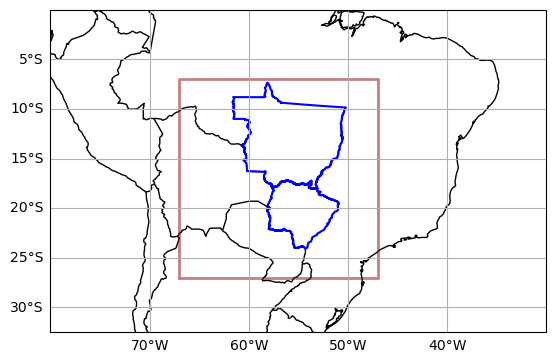

In [85]:
fig, ax = plt.subplots(subplot_kw = {"projection" : mapproj, "extent" : (-80,-30,-30,0)})
ax.gridlines(draw_labels = ["bottom", "left"])
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)

ax.plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], color = "darkred", lw = 2, alpha = 0.5)

sf.loc[[10,11]].boundary.plot(ax = ax, color = "blue")

# Fire indices & active fires

In [86]:
# load all active fire data
df = pd.concat([pd.read_csv(fnm, parse_dates = ["acq_date"], index_col = "acq_date") for fnm in glob.glob("data/*M-C61*")])

# convert to geodataframe (standard lat-lon coords) & reproject geometry, add Lambert coordinates to gdf
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(x=df.longitude, y=df.latitude), crs = "EPSG:4326")

# filter out low-confidence points
df = df.loc[df.confidence >= 80]

In [87]:
da_2024 = wrap_lon(xr.open_dataset("data/era5-fire/fwi-subindices_2024.nc").reset_coords(drop = True))
dsr_m_2024 = da_2024.fdsrte.resample(time = "MS").mean()

da_2023 = wrap_lon(xr.open_dataset("data/era5-fire/fwi-subindices_2023.nc").reset_coords(drop = True))
dsr_m_2023 = da_2023.fdsrte.resample(time = "MS").mean()

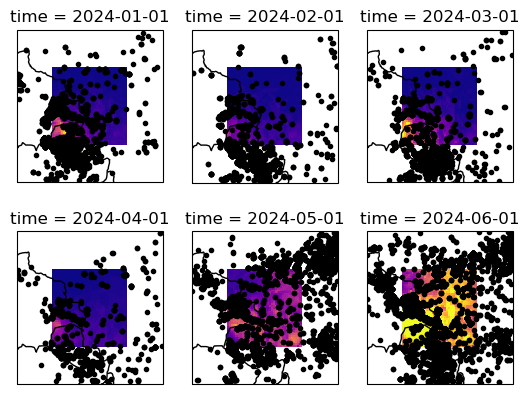

In [90]:
nc = 3; nr = 2
fig, axs = plt.subplots(nr, nc, subplot_kw = {"projection" : mapproj, "extent" : (xn,xx,yn,yx)})

plot_kwargs = {"vmin" : 0, "vmax" : 20, "cmap" : "plasma"}

for i in range(6):
    ax = fig.axes[i]
    df_m = df.loc["2024-"+str(i+1)]
    
    dsr_m_2024.groupby("time.month")[i+1].plot(ax = ax, **plot_kwargs, add_colorbar = False)
    ax.add_feature(cartopy.feature.BORDERS)
    
    df_m.plot(ax = ax, marker = ".", color = "k")

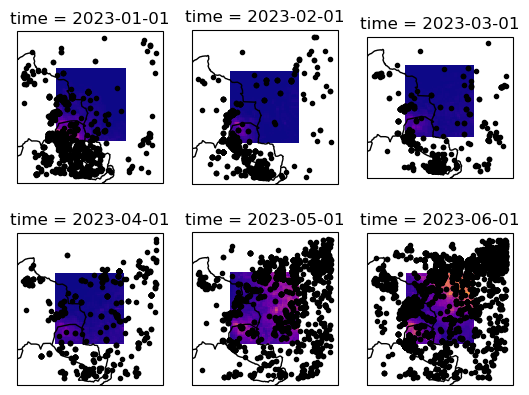

In [89]:
nc = 3; nr = 2
fig, axs = plt.subplots(nr, nc, subplot_kw = {"projection" : mapproj, "extent" : (xn,xx,yn,yx)})

plot_kwargs = {"vmin" : 0, "vmax" : 20, "cmap" : "plasma"}

for i in range(6):
    ax = fig.axes[i]
    df_m = df.loc["2023-"+str(i+1)]
    
    dsr_m_2023.groupby("time.month")[i+1].plot(ax = ax, **plot_kwargs, add_colorbar = False)
    ax.add_feature(cartopy.feature.BORDERS)
    
    df_m.plot(ax = ax, marker = ".", color = "k")